In [ ]:
# 📦 Install required libraries
!pip install scikit-learn matplotlib seaborn

In [ ]:
# 📚 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial import Polynomial
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# 🎲 Step 1: Generate Quartic Polynomial Dataset
def generate_quartic_dataset(n_samples=40000, seed=42):
    np.random.seed(seed)
    a = np.random.uniform(-10, 10, n_samples)
    b = np.random.uniform(-10, 10, n_samples)
    c = np.random.uniform(-10, 10, n_samples)
    d = np.random.uniform(-10, 10, n_samples)

    data = []
    for i in range(n_samples):
        coeffs = [1, a[i], b[i], c[i], d[i]]
        roots = np.roots(coeffs)
        is_all_real = np.all(np.isreal(roots))
        label = 0 if is_all_real else 1
        data.append([a[i], b[i], c[i], d[i], label])

    df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'label'])
    return df

df = generate_quartic_dataset()
print(df['label'].value_counts(normalize=True))  # class distribution
df.head()


label
1    0.895275
0    0.104725
Name: proportion, dtype: float64


,a,b,c,d,label
0,-2.509198,-4.021759,6.363289,-7.404921,1
1,9.014286,-8.103644,-7.094605,0.794518,0
2,4.639879,-7.472816,8.929276,2.307727,1
3,1.973170,-6.386577,6.864482,0.154105,1
4,-6.879627,-5.926933,8.377066,0.351944,0


In [ ]:
# Step 2: Add engineered features to help ML models
df['a2'] = df['a']**2
df['b2'] = df['b']**2
df['c2'] = df['c']**2
df['d2'] = df['d']**2
df['ab'] = df['a'] * df['b']
df['bc'] = df['b'] * df['c']
df['cd'] = df['c'] * df['d']
df['abc'] = df['a'] * df['b'] * df['c']

features = ['a', 'b', 'c', 'd', 'a2', 'b2', 'c2', 'd2', 'ab', 'bc', 'cd', 'abc']
X = df[features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

In [ ]:
# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_score = tree_model.score(X_test, y_test)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

In [ ]:
print(f"SVM Accuracy: {svm_score:.4f}")
print(f"Decision Tree Accuracy: {tree_score:.4f}")
print(f"Random Forest Accuracy: {rf_score:.4f}")

SVM Accuracy: 0.9313
Decision Tree Accuracy: 0.9340
Random Forest Accuracy: 0.9784


### Visualizations

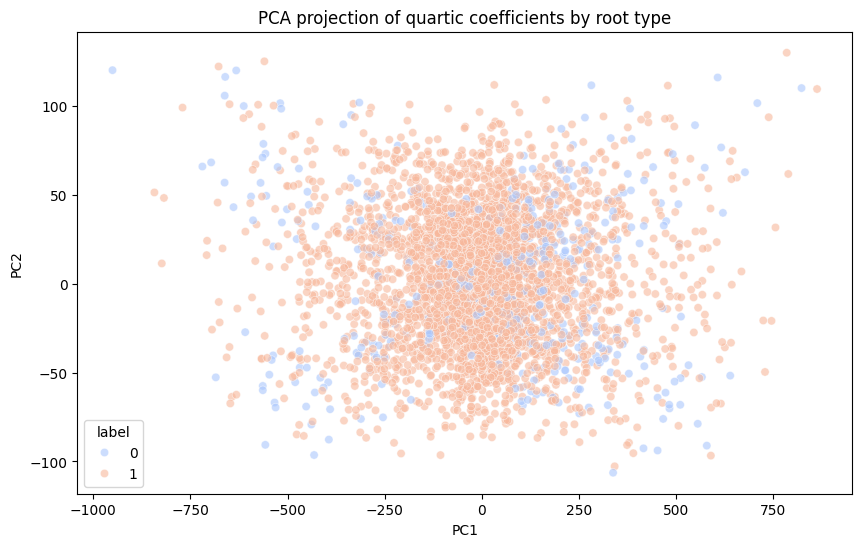

In [ ]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='PC1', y='PC2', hue='label', palette='coolwarm', alpha=0.6)
plt.title("PCA projection of quartic coefficients by root type")
plt.show()


<ipython-input-12-86b6d8ac7385>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


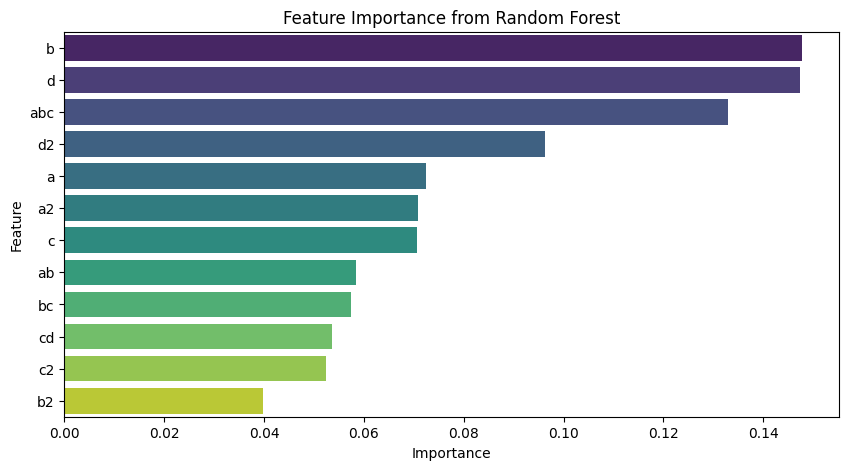

In [ ]:
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()


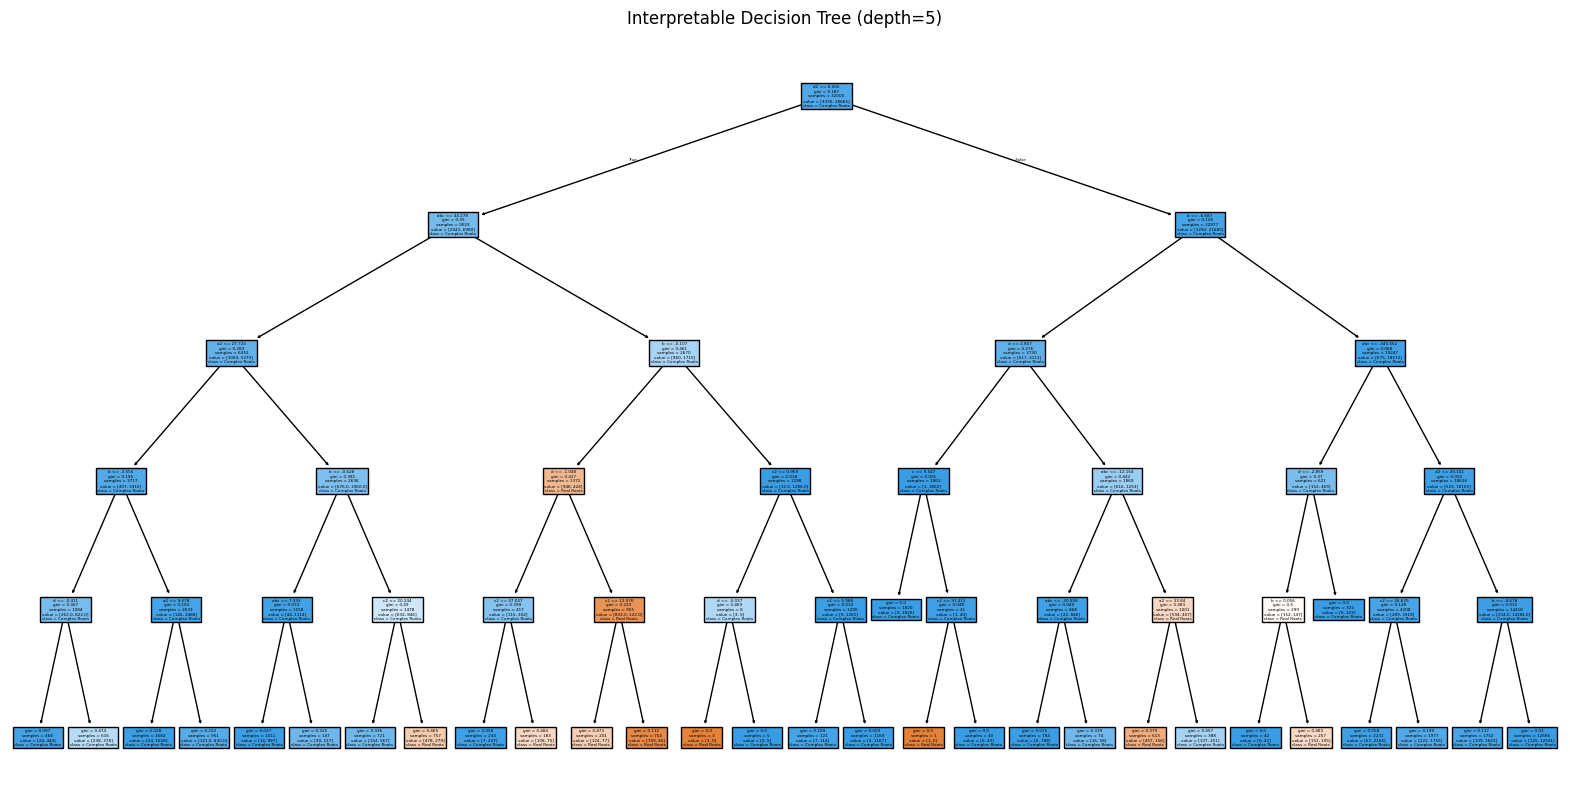

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, class_names=['Real Roots', 'Complex Roots'], filled=True)
plt.title("Interpretable Decision Tree (depth=5)")
plt.show()


### Visualizations - detailed

In [ ]:
# You already have matplotlib, but let's make sure 3D plotting works
from mpl_toolkits.mplot3d import Axes3D


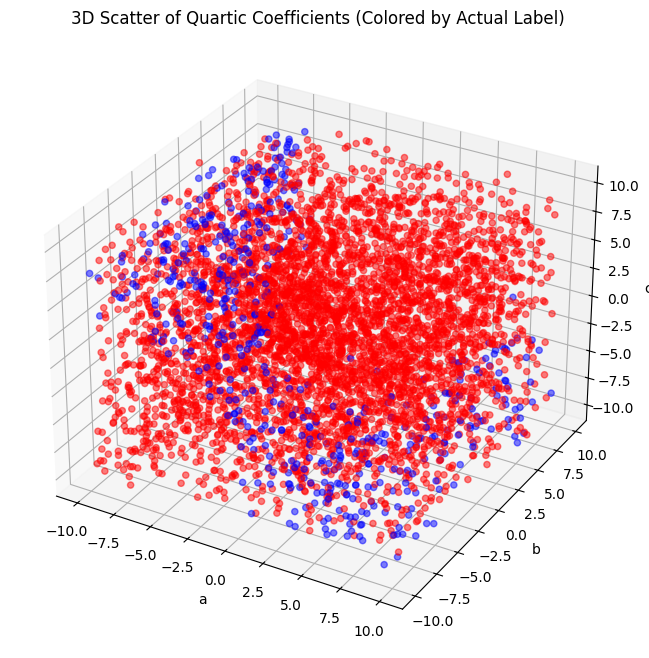

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sample_df = df.sample(5000)
x, y_, z = sample_df['a'], sample_df['b'], sample_df['c']
colors = sample_df['label'].map({0: 'blue', 1: 'red'})

ax.scatter(x, y_, z, c=colors, alpha=0.5)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.set_title('3D Scatter of Quartic Coefficients (Colored by Actual Label)')
plt.show()


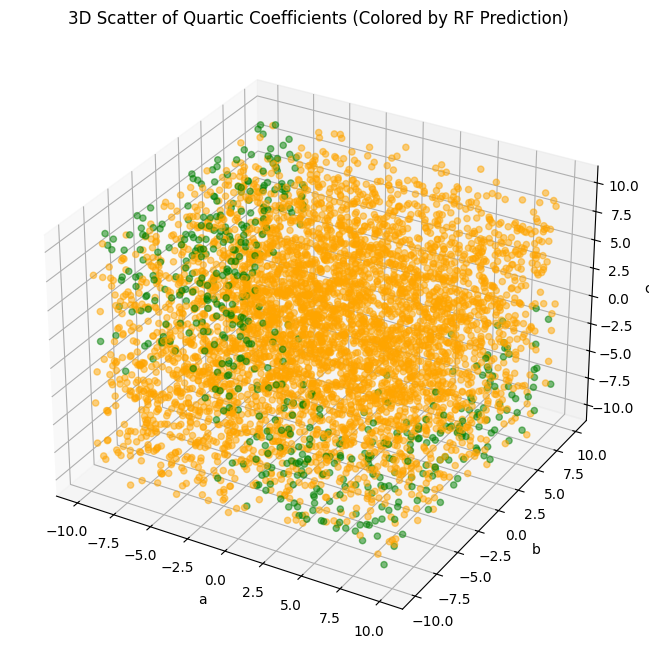

In [ ]:
# Add predictions to DataFrame for visualization
df['pred_rf'] = rf_model.predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sample_df = df.sample(5000)
x, y_, z = sample_df['a'], sample_df['b'], sample_df['c']
colors = sample_df['pred_rf'].map({0: 'green', 1: 'orange'})

ax.scatter(x, y_, z, c=colors, alpha=0.5)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.set_title('3D Scatter of Quartic Coefficients (Colored by RF Prediction)')
plt.show()


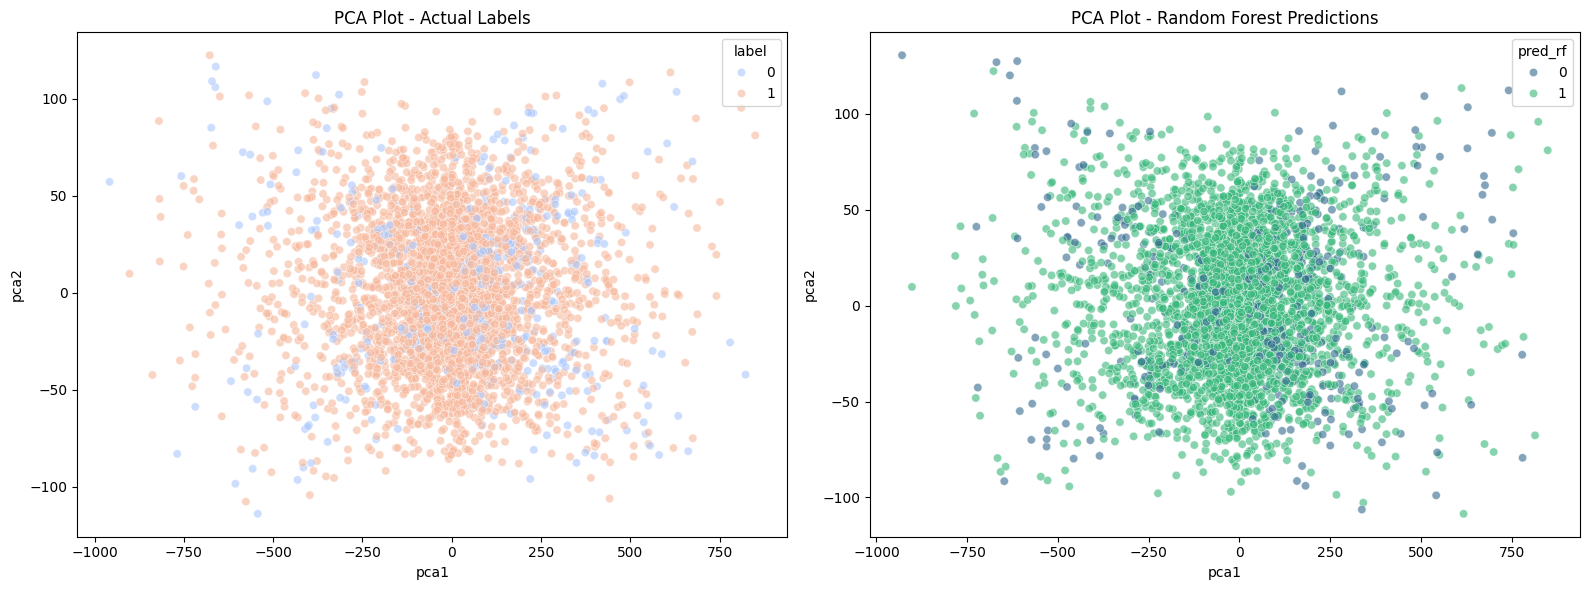

In [ ]:
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df.sample(5000), x='pca1', y='pca2', hue='label', ax=axs[0], palette='coolwarm', alpha=0.6)
axs[0].set_title("PCA Plot - Actual Labels")

sns.scatterplot(data=df.sample(5000), x='pca1', y='pca2', hue='pred_rf', ax=axs[1], palette='viridis', alpha=0.6)
axs[1].set_title("PCA Plot - Random Forest Predictions")

plt.tight_layout()
plt.show()


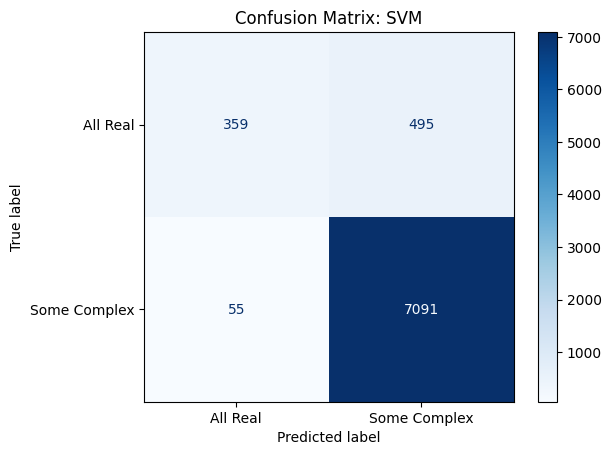

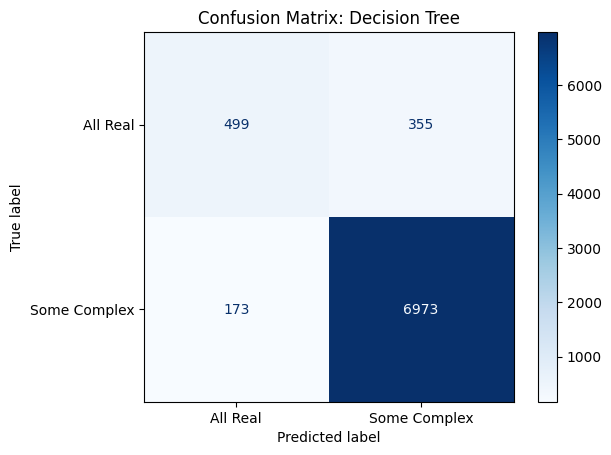

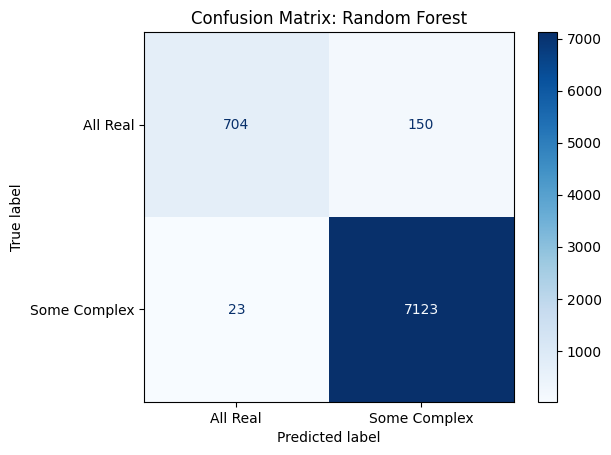

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for model, name in zip([svm_model, tree_model, rf_model], ['SVM', 'Decision Tree', 'Random Forest']):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['All Real', 'Some Complex'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()


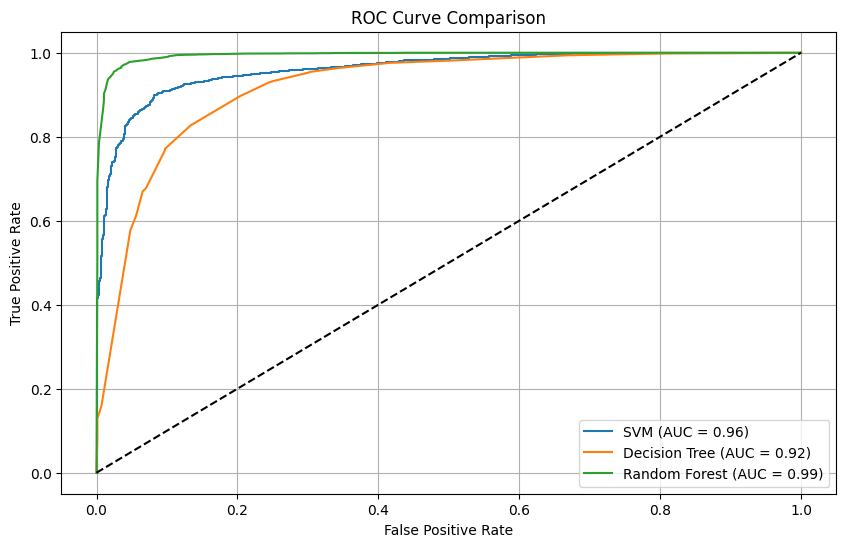

In [ ]:
from sklearn.metrics import roc_curve, auc

models = {
    "SVM": svm_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        # fallback for SVM
        y_score = model.decision_function(X_test)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # normalize

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Random Forest Report
y_pred_rf = rf_model.predict(X_test)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["All Real Roots", "Some Complex Roots"]))

Classification Report (Random Forest):
                    precision    recall  f1-score   support

    All Real Roots       0.97      0.82      0.89       854
Some Complex Roots       0.98      1.00      0.99      7146

          accuracy                           0.98      8000
         macro avg       0.97      0.91      0.94      8000
      weighted avg       0.98      0.98      0.98      8000



In [ ]:
# SVM Report
y_pred_svm = svm_model.predict(X_test)
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["All Real Roots", "Some Complex Roots"]))



Classification Report (SVM):
                    precision    recall  f1-score   support

    All Real Roots       0.87      0.42      0.57       854
Some Complex Roots       0.93      0.99      0.96      7146

          accuracy                           0.93      8000
         macro avg       0.90      0.71      0.76      8000
      weighted avg       0.93      0.93      0.92      8000



In [ ]:
# Decision Tree Report
y_pred_tree = tree_model.predict(X_test)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree, target_names=["All Real Roots", "Some Complex Roots"]))


Classification Report (Decision Tree):
                    precision    recall  f1-score   support

    All Real Roots       0.74      0.58      0.65       854
Some Complex Roots       0.95      0.98      0.96      7146

          accuracy                           0.93      8000
         macro avg       0.85      0.78      0.81      8000
      weighted avg       0.93      0.93      0.93      8000

